In [1]:
# importando as bibliotecas necessárias para a execução do código.

import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Redução de dimensonalidade.

Com a redução de dimensionalidade, busca-se misturar os dados, de modo a ter uma melhor noção do "peso" de cada feature que engloba o maior número de cenários possíveis para previsão. Para isso, é feita uma série de transformações e análises dos dados a fim de maximizar a quantidade e qualidade dos dados selecionados, além de melhorar, de maneira geral, o desempenho e visualização dos dados e resultados obtidos. Ou seja, o início se dá a partir de dados quantitativos. Tendo como objetivo reduzir a dimensionalidade do sistema, combina-se várias features, obtendo um gráfico tridimensional. Para isso, vamos utilizar o mátodo de análise do componente principal (_PCA - principal component analysis_, do inglês). Em essência, PCA consiste em um processo estátistico para reduzir a dimensionalidade, como já fora dito, utilizando-se de transformação ortogonal, converte valores possivelmente relacionados em valores não relacionados.

### PCA

In [24]:
# importando o csv.
df = pd.read_csv("Final Data.csv", index_col="Unnamed: 0")
# definindo as features.
features = ["latitude", "wind_speed", "wind_degree", "pressure", "humidity", "cloudcover", "uv_index", "visibility"]
# dataframe só das features
df_features = df.reindex(features, axis=1)
df_features

,latitude,wind_speed,wind_degree,pressure,humidity,cloudcover,uv_index,visibility
7,84.94,14,163,1022,80,5,1,10
8,84.22,14,163,1022,80,5,1,10
9,83.49,14,163,1022,80,5,1,10
10,82.77,14,163,1022,80,5,1,10
11,82.05,28,109,1013,80,37,1,10
...,...,...,...,...,...,...,...,...
224,-71.90,30,121,1002,60,46,1,10
225,-72.60,30,121,1002,60,46,1,10
226,-73.30,30,121,1002,60,46,1,10
227,-74.10,30,121,1002,60,46,1,10


Agora, como foi apresentado, é necessário a normalização.

In [25]:
norm = StandardScaler()
norm.fit(df_features)
df_norm = norm.transform(df_features)
df_norm

array([[ 1.633543  , -0.02979789, -0.08339266, ..., -0.75624212,
        -0.85121837,  0.2974301 ],
       [ 1.61598815, -0.02979789, -0.08339266, ..., -0.75624212,
        -0.85121837,  0.2974301 ],
       [ 1.59818948, -0.02979789, -0.08339266, ..., -0.75624212,
        -0.85121837,  0.2974301 ],
       ...,
       [-2.22462333,  1.70563098, -0.49359438, ...,  0.46414687,
        -0.85121837,  0.2974301 ],
       [-2.24412872,  1.70563098, -0.49359438, ...,  0.46414687,
        -0.85121837,  0.2974301 ],
       [-2.26119594,  1.70563098, -0.49359438, ...,  0.46414687,
        -0.85121837,  0.2974301 ]])

Rodando o primeiro PCA, que realiza uma transformação.

In [27]:
pca = PCA()
pca.fit(df_norm)
df_pca = pca.transform(df_norm)
df_pca

array([[ 0.50112546, -1.78328793, -2.01260304, ..., -0.306441  ,
         0.26089884,  0.33953278],
       [ 0.49433503, -1.77297386, -2.01336088, ..., -0.30400701,
         0.24947345,  0.33547221],
       [ 0.48745029, -1.76251655, -2.01412923, ..., -0.30153921,
         0.23788938,  0.33135523],
       ...,
       [-0.57370616,  3.01365745,  2.26039495, ...,  0.00998104,
        -0.54295225,  0.14488549],
       [-0.58125108,  3.02511752,  2.25955292, ...,  0.01268548,
        -0.55564712,  0.14037373],
       [-0.58785289,  3.03514508,  2.25881613, ...,  0.01505186,
        -0.56675514,  0.13642595]])

Plotando os componentes 1 e 2, que representam autovetores da matriz de co-variância, seguido pelo plot das componentes 1, 2 e 3, formando um gráfico 3D.

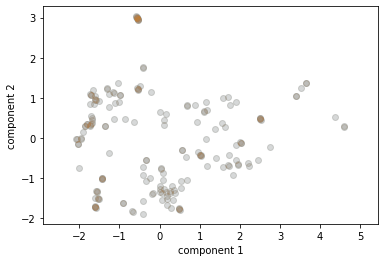

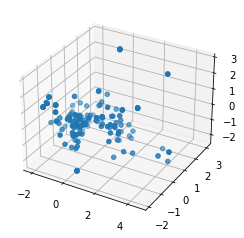

In [64]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.1)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axis('equal');

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2])

Nesse gráfico, percebemos que não há uma separação clara dos dados. Assim, não há a formação de nenhum grupo definido, ou seja, não há clusters. Com isso, se torna mais complexa uma interpretação integral dos dados.

Adicionando cor, buscando melhor interpretação, baseado na temperatura e tentando observar se a alguma relação entre os componentes e a clusterização pela temperatura.

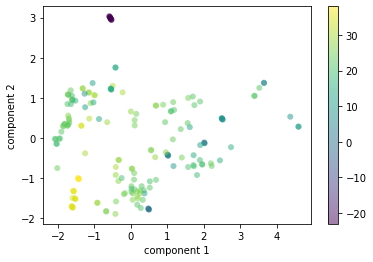

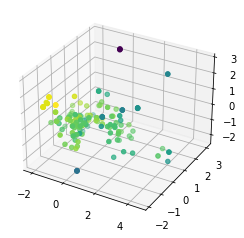

In [65]:
feat = 'temperature'

plt.scatter(df_pca[:, 0], df_pca[:, 1], edgecolor='none', alpha=0.5, c=df[feat].values)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=df[feat].values)

É possivel perceber algumas regiões onde há a clusterização de pontos, porém ainda não é possível fazer previsões partindo-se disso.

Plot com relação ao feels like.

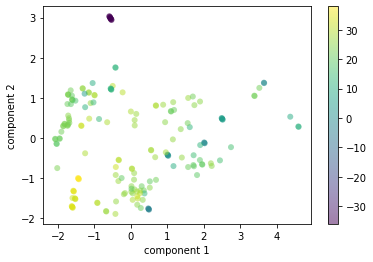

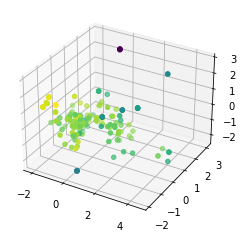

In [53]:
feat = 'feelslike'

plt.scatter(df_pca[:, 0], df_pca[:, 1], edgecolor='none', alpha=0.5, c=df[feat].values)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=df[feat].values)

Podemos perceber que a relação sensação térmica e temperatura persiste, uma vez que ambos os gráficos ficaram extremamente semelhantes.

Plotando a matriz de loading, que mostra a consideração de cada feature para cada componente.

In [56]:
component_names = [f"PC{i+1}" for i in range(df_pca.shape[1])]

loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=df_features.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
latitude,0.386812,-0.587533,0.043169,0.080870,0.021400,-0.138651,0.650839,0.231308
wind_speed,0.013289,0.232495,0.527340,0.676209,0.244317,0.329574,0.180113,-0.098351
wind_degree,0.123732,0.248646,-0.471703,-0.049826,0.811862,-0.043950,0.177913,-0.071942
pressure,-0.022984,-0.360872,-0.576672,0.572096,-0.170864,0.123875,-0.184372,-0.361754
humidity,0.573301,-0.004456,0.055115,0.246553,0.114902,-0.248820,-0.588916,0.430749
cloudcover,0.568955,0.190346,0.148758,-0.140098,-0.154875,-0.235525,0.051486,-0.718466
uv_index,-0.063142,-0.602366,0.330277,-0.265592,0.435615,0.231999,-0.358736,-0.285079
visibility,-0.421890,-0.097982,0.175344,0.235520,0.156808,-0.826846,-0.012525,-0.133320


Plotando a variância explicada e acumulada graficamente, para a obtenção do número ideal de componentes para a visualização que representa a maior quantidade de dados.

array([<AxesSubplot:title={'center':'Variancia explicada'}, xlabel='Componente'>,
       <AxesSubplot:title={'center':'Variância acumulada'}, xlabel='Componente'>],
      dtype=object)

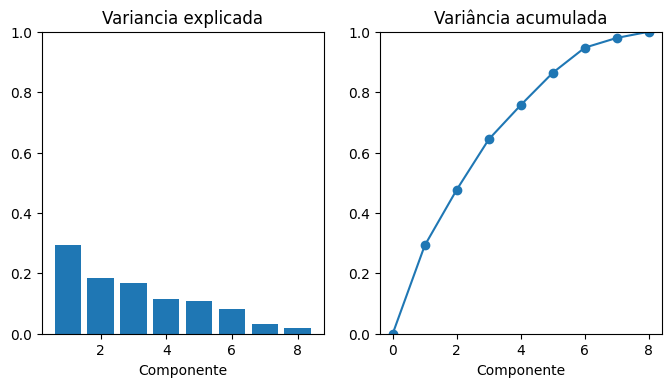

In [63]:
def plot_variance(pca, width=8, dpi=100):
    # Criar figura
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    
    # Fazer o cálculo da variância explicada
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Componente", 
        title="Variancia explicada", 
        ylim=(0.0, 1.0)
    )
    
    # Variância acumulada
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Componente", 
        title="Variância acumulada", 
        ylim=(0.0, 1.0)
    )
    
    # Detalhes da figura
    fig.set(figwidth=8, dpi=100)
    return axs

# Graficar
plot_variance(pca)

A variância explicada retorna quanto, apesar da perda, é possível representar seus dados, de maneira significativa. Já a variância acumulada representa a soma das componentes, mostrando quão bem há a representação do dataset por aquela quantidade de dados.